In [1]:
## ----- running in the colob platform ------ 
# ## Mount on google drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [1]:
import os
os.chdir('..')
from notebooks import config
import glob
import matplotlib.pyplot as plt
from utils.raster_vec import vec2mask
from utils.geotif_io import readTiff
from utils.imgShow import imgShow

In [2]:
### get the labeled landsat images
paths_vec = sorted(glob.glob('data/dset-l578/gpkg/*_truth_final.gpkg'))
names_img = [path_vec.split('/')[-1].replace('_truth_final.gpkg','') 
                                                for path_vec in paths_vec]


In [3]:
## convert the .gpkg vector to .tiff truth image.
for name in names_img:
    path_vec = 'data/dset-l578/gpkg/'+ name + '_truth_final.gpkg'
    path_scene = 'data/dset-l578/scene/'+ name +'.tif'
    path_output = 'data/dset-l578/truth/'+ name + '_truth.tif'
    if os.path.exists(path_output):
        continue
    mask = vec2mask(vec_path=path_vec, raster_path=path_scene, output_path=path_output)
    print('mask saved to -->',path_output)


mask saved to --> data/dset-l578/truth/l5_scene_11_truth.tif
mask saved to --> data/dset-l578/truth/l5_scene_12_truth.tif
mask saved to --> data/dset-l578/truth/l5_scene_15_truth.tif
mask saved to --> data/dset-l578/truth/l5_scene_16_truth.tif
mask saved to --> data/dset-l578/truth/l5_scene_19_truth.tif
mask saved to --> data/dset-l578/truth/l5_scene_20_truth.tif
mask saved to --> data/dset-l578/truth/l7_scene_10_truth.tif
mask saved to --> data/dset-l578/truth/l7_scene_11_truth.tif
mask saved to --> data/dset-l578/truth/l7_scene_15_truth.tif
mask saved to --> data/dset-l578/truth/l8_scene_11_truth.tif
mask saved to --> data/dset-l578/truth/l8_scene_16_truth.tif
mask saved to --> data/dset-l578/truth/l8_scene_19_truth.tif


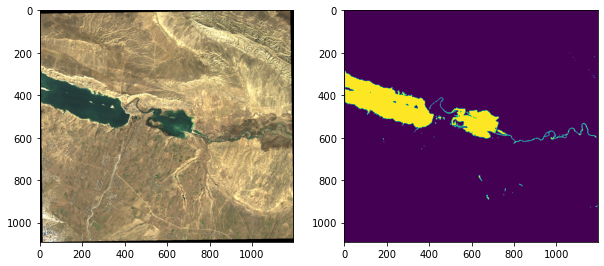

In [5]:
### check the generated pair-wise (image and truth) dataset
scene_name = 'l5_scene_20'
path_raster = 'data/dset-l578/scene/'+ scene_name+'.tif'
path_output = 'data/dset-l578/truth/'+ scene_name + '_truth.tif'
img, _ = readTiff(path_in=path_raster)
truth, _ = readTiff(path_in=path_output)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
imgShow(img)
plt.subplot(1,2,2)
imgShow(truth)
